# Tabular models

In [1]:
from fastai.tabular import *

Tabular data should be in a Pandas `DataFrame`.

In [2]:
path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv')

In [9]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [10]:
dep_var = 'salary'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']
procs = [FillMissing, Categorify, Normalize]

In [11]:
test = TabularList.from_df(df.iloc[800:1000].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [12]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(800,1000)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [13]:
data.show_batch(rows=10)

workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,target
?,HS-grad,Divorced,?,Unmarried,Black,False,-0.4828,7.5080,-0.4224,<50k
Self-emp-inc,Some-college,Never-married,Exec-managerial,Not-in-family,White,False,-0.7760,-0.7174,-0.0312,<50k
State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,False,-0.0430,1.4889,-0.4224,<50k
Private,HS-grad,Separated,Other-service,Not-in-family,White,False,0.1036,-0.1881,-0.4224,<50k
Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,False,0.3968,0.1693,1.1422,>=50k
Private,11th,Married-spouse-absent,Handlers-cleaners,Unmarried,White,False,-0.6294,1.9891,-1.2046,<50k
Private,Some-college,Divorced,Prof-specialty,Not-in-family,White,False,-0.4828,-1.3947,-0.0312,<50k
Private,11th,Never-married,Sales,Not-in-family,White,False,-0.2629,-0.7749,-1.2046,<50k
Private,HS-grad,Married-civ-spouse,Adm-clerical,Husband,Black,True,-0.7760,2.0604,-0.0312,<50k
Private,Prof-school,Never-married,Prof-specialty,Not-in-family,White,False,-0.6294,-0.1692,1.9245,<50k


In [17]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


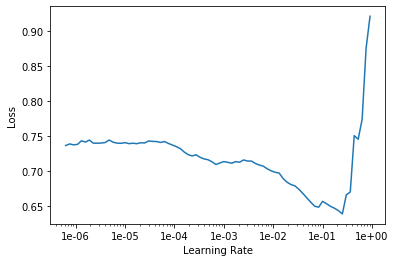

In [21]:
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.372314,0.378735,0.825000,00:06
1,0.361246,0.385340,0.820000,00:05
2,0.355389,0.371816,0.830000,00:05
3,0.358008,0.367261,0.835000,00:06
4,0.354512,0.366946,0.840000,00:06


## Inference

In [23]:
row = df.iloc[0]

In [24]:
learn.predict(row)

(Category >=50k, tensor(1), tensor([0.4799, 0.5201]))

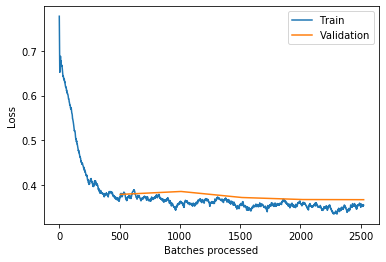

In [27]:
learn.recorder.plot_losses()